<a href="https://colab.research.google.com/github/Belal-AI/Rev-Projects/blob/main/inception_tech_and_skip_connection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten , concatenate ,Input,Dense,Add
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pylab as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

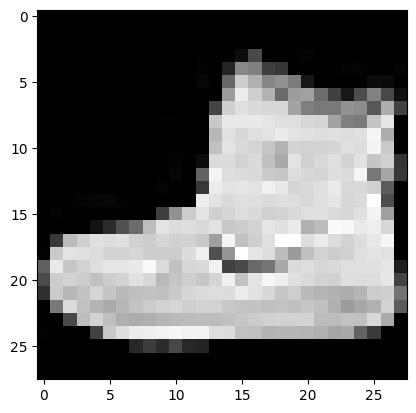

In [4]:
plt.imshow(train_images[0],cmap='gray')

## Inception Moduol
its use all the valid kernal sizes togather and make the ml model learn which is better or which more suitable for the model
- In Convolutional Neural Networks (CNNs), a large part of the work is to choose the right layer to apply, among the most common options (1x1 filter, 3x3 filter, 5x5 filter or max-pooling). All we need is to find the optimal local construction and to repeat it spatially.-

In [5]:
input_img = Input(shape=(28, 28, 1))

### 1st layer
layer_1 = Conv2D(10, (1,1), kernel_initializer="glorot_uniform",padding='same', activation='relu')(input_img)
layer_1 = Conv2D(10, (3,3), padding='same', kernel_initializer="glorot_uniform", activation='relu')(layer_1)

layer_2 = Conv2D(10, (1,1), padding='same', kernel_initializer="glorot_uniform", activation='relu')(input_img)
layer_2 = Conv2D(10, (5,5), padding='same', kernel_initializer="glorot_uniform", activation='relu')(layer_2)

layer_3 = MaxPool2D((3,3), strides=(1,1), padding='same')(input_img)
layer_3 = Conv2D(10, (1,1), padding='same', kernel_initializer="glorot_uniform", activation='relu')(layer_3)

mid_1 = tf.keras.layers.concatenate([layer_1, layer_2, layer_3], axis = 3)

In [6]:
flat_1 = Flatten()(mid_1)

dense_1 = Dense(1200, activation='relu')(flat_1)
dense_2 = Dense(600, activation='relu')(dense_1)
dense_3 = Dense(150, activation='relu')(dense_2)
output = Dense(10, activation='softmax')(dense_3)

In [7]:
model = tf.keras.Model([input_img], output)


In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 28, 28, 10)   20          ['input_1[0][0]']                
                                                                                                  
 conv2d_2 (Conv2D)              (None, 28, 28, 10)   20          ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 28, 28, 1)    0           ['input_1[0][0]']                
                                                                                              

In [9]:
class mycallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if logs['accuracy'] >.80:
      self.model.stop_training=True

In [10]:
callback=mycallbacks()

In [11]:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(train_images , train_labels, epochs=1, batch_size=64, validation_data=(test_images, test_labels),callbacks=[callback])

 64/938 [=>............................] - ETA: 13:50 - loss: 122.6663 - accuracy: 0.4597

KeyboardInterrupt: ignored

Skip Connections

In [13]:
input=Input(shape=(28,28,1))
L1 = tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3),  activation='relu', padding='same')(input)
bn = tf.keras.layers.BatchNormalization()(L1)

L2 = tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3),  activation='relu', padding='same')(bn)
bn = tf.keras.layers.BatchNormalization()(L2)

L3 = tf.keras.layers.Conv2D(filters=16, kernel_size=(1,1),activation='relu', padding='same')(bn)
L3 = tf.keras.layers.BatchNormalization()(L3)
print(L3.shape)
L3 = tf.keras.layers.MaxPooling2D(pool_size=(2,2),  padding='same')(L3)
print(L3.shape)
# skipping layer
skip = tf.keras.layers.Conv2D(filters=16, kernel_size=(1,1), strides=(2,2), activation='relu', padding='same')(bn)
skip = tf.keras.layers.BatchNormalization()(skip)
sum1 = tf.keras.layers.Add()([L3,skip])
flat=Flatten()(sum1)
dense=Dense(10,activation='softmax')(flat)
model = tf.keras.Model(inputs=input, outputs=dense)


(None, 28, 28, 16)
(None, 14, 14, 16)
